In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import datetime

In [7]:
file = ".." + os.sep + "data" + os.sep + "tianchi_mobile_recommend_train_user.csv"

In [3]:
df = pd.read_csv(file)

In [4]:
df.sample(3)

user_id    item_id  behavior_type user_geohash  item_category  \
7125535   105875466   55189632              1      94h6ah5          10314   
7963215   129072372  279685018              1      9rfj43o          13853   
10182349  136220191  376619037              1          NaN           4370   

                   time  
7125535   2014-12-18 21  
7963215   2014-11-22 14  
10182349  2014-12-10 11

In [5]:
user_amount  = len(list(set(df["user_id"])))
item_amount  = len(list(set(df["item_id"])))
category_amount  = len(list(set(df["item_category"])))

In [8]:
print("There are totally {} users, {} items, {} categories".format(
                        user_amount, item_amount, category_amount))

There are totally 10000 users, 2876947 items, 8916 categories


In [9]:
df.dtypes

user_id           int64
item_id           int64
behavior_type     int64
user_geohash     object
item_category     int64
time             object
dtype: object

In [10]:
df["time"] = pd.to_datetime(df["time"], format = "%Y-%m-%d %H")

In [11]:
df.dtypes

user_id                   int64
item_id                   int64
behavior_type             int64
user_geohash             object
item_category             int64
time             datetime64[ns]
dtype: object

In [12]:
# why slow?
print("time duration ({}, {})".format(min(df["time"]), max(df["time"])))

time duration (2014-11-18 00:00:00, 2014-12-18 23:00:00)


In [13]:
df["behavior_type"].value_counts()

1    11550581
3      343564
2      242556
4      120205
Name: behavior_type, dtype: int64

In [14]:
df["day"] = df["time"].map(lambda t: t.day)
df["month"] = df["time"].map(lambda t: t.month)
df["weekday"] = df["time"].map(lambda t: t.isoweekday())
df["hour"] = df["time"].map(lambda t: t.hour)

In [15]:
df_1 = df[df["behavior_type"] == 1]
df_2 = df[df["behavior_type"] == 2]
df_3 = df[df["behavior_type"] == 3]
df_4 = df[df["behavior_type"] == 4]

AttributeError: Unknown property step

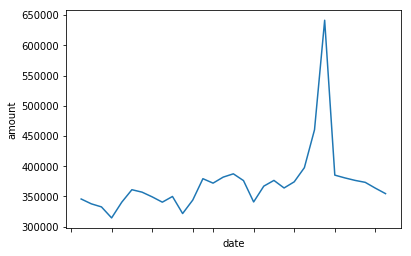

In [15]:
tmp = df_1.groupby(["month", "day"]).size()
tmp = pd.DataFrame(tmp)
tmp.columns = ["amount"]
tmp = tmp.reset_index()
tmp["date"] = tmp.apply(lambda r: datetime.datetime(2014, r["month"], r["day"]), axis =1)

f, ax = plt.subplots()
g = sns.lineplot( x = "date", y = "amount", data = tmp, ax = ax)
# g = sns.FacetGrid(tmp.sort_values(by = 'date'),size=3, aspect = 2)
# g.map(plt.plot,'date','amount',alpha=0.9)
g.set_xticklabels(labels = ax.get_xticklabels(), step=2)
# for tick in ax.get_xticklabels():
#     tick.set_rotation(90)
# ax.set_title("pv trendency")
# ax.set_xticks()
# plt.xticks(date_list)
# ax.set_xticklabels(ax.get_xticklabels(), rotation = -90)

In [16]:
tmp.dtypes

month              int64
day                int64
amount             int64
date      datetime64[ns]
dtype: object

In [24]:
tmp["date"] = tmp["date"].map(lambda d : str(d))

In [17]:
# tmp.to_excel("pv.xlsx")

In [16]:
# df_4[2:3]

In [36]:
# df[(df["user_id"] == 104811265) & (df["item_id"] == 61764614)]

### 计算每天的pv活跃率（以总人数作为底数），以及人均pv次数

In [20]:
def cal_act_ratio(group):
    daily_user_amount = len(set(list(group["user_id"])))
    act_ratio = daily_user_amount / user_amount
    avg_pv = len(group)/daily_user_amount
    return act_ratio
#     , avg_pv

cal_df = df
tmp = cal_df.groupby(["month", "day"]).apply(cal_act_ratio)
tmp.columns = ["user_act_ratio"]
tmp = tmp.reset_index()
tmp["date"] = tmp.apply(lambda r: datetime.datetime(2014, int(r["month"]), int(r["day"])), axis = 1)
tmp["weekday"] = tmp["date"].map(lambda r: r.isoweekday())
tmp["week"] = tmp["date"].map(lambda r: r.isocalendar()[1])
print(tmp)
#tmp.to_excel("user_ratio.xlsx")
tmp = tmp.set_index(["week", "weekday"])
# tmp
tmp = tmp.drop(columns = ["month", "day"])
tmp.unstack()

    month  day       0       date  weekday  week
0      11   18  0.6343 2014-11-18        2    47
1      11   19  0.6420 2014-11-19        3    47
2      11   20  0.6333 2014-11-20        4    47
3      11   21  0.6276 2014-11-21        5    47
4      11   22  0.6187 2014-11-22        6    47
5      11   23  0.6373 2014-11-23        7    47
6      11   24  0.6513 2014-11-24        1    48
7      11   25  0.6351 2014-11-25        2    48
8      11   26  0.6357 2014-11-26        3    48
9      11   27  0.6359 2014-11-27        4    48
10     11   28  0.6189 2014-11-28        5    48
11     11   29  0.6224 2014-11-29        6    48
12     11   30  0.6379 2014-11-30        7    48
13     12    1  0.6544 2014-12-01        1    49
14     12    2  0.6550 2014-12-02        2    49
15     12    3  0.6585 2014-12-03        3    49
16     12    4  0.6531 2014-12-04        4    49
17     12    5  0.6367 2014-12-05        5    49
18     12    6  0.6440 2014-12-06        6    49
19     12    7  0.64

0                                                       date  \
weekday       1       2       3       4       5       6       7          1   
week                                                                         
47          NaN  0.6343  0.6420  0.6333  0.6276  0.6187  0.6373        NaT   
48       0.6513  0.6351  0.6357  0.6359  0.6189  0.6224  0.6379 2014-11-24   
49       0.6544  0.6550  0.6585  0.6531  0.6367  0.6440  0.6422 2014-12-01   
50       0.6564  0.6566  0.6652  0.6894  0.7720  0.6776  0.6668 2014-12-08   
51       0.6787  0.6729  0.6643  0.6582     NaN     NaN     NaN 2014-12-15   

                                                                           
weekday          2          3          4          5          6          7  
week                                                                       
47      2014-11-18 2014-11-19 2014-11-20 2014-11-21 2014-11-22 2014-11-23  
48      2014-11-25 2014-11-26 2014-11-27 2014-11-28 2014-11-29 2014-11-30  
49      2014-12-02 2014-12-03 2014-12-04 2014-12-05 2014-12-06 2014-12-07  
50      2014-12-09 2014-12-10 2014-12-11 2014-12-12 2014-12-13 2014-12-14  
51      2014-12-16 2014-12-17 2014-12-18        NaT        NaT        NaT

In [24]:
def cal_avg_pv(group):
    g1 = group[group["behavior_type"] == 1] 
    daily_user_amount = len(set(list(group["user_id"])))
    avg_pv = len(g1)/daily_user_amount
#     print(g1, daily_user_amount)
    return avg_pv

cal_df = df
tmp = cal_df.groupby(["month", "day"]).apply(cal_avg_pv)
tmp.columns = ["user_act_ratio"]
tmp = tmp.reset_index()
tmp["date"] = tmp.apply(lambda r: datetime.datetime(2014, int(r["month"]), int(r["day"])), axis = 1)
tmp["weekday"] = tmp["date"].map(lambda r: r.isoweekday())
tmp["week"] = tmp["date"].map(lambda r: r.isocalendar()[1])
print(tmp)
# tmp.to_excel("avg_pv.xlsx")
tmp = tmp.set_index(["week", "weekday"])
# tmp
tmp = tmp.drop(columns = ["month", "day"])
tmp.unstack()

    month  day          0       date  weekday  week
0      11   18  54.525461 2014-11-18        2    47
1      11   19  52.627726 2014-11-19        3    47
2      11   20  52.548871 2014-11-20        4    47
3      11   21  50.123008 2014-11-21        5    47
4      11   22  55.044933 2014-11-22        6    47
5      11   23  56.679900 2014-11-23        7    47
6      11   24  54.842930 2014-11-24        1    48
7      11   25  55.013699 2014-11-25        2    48
8      11   26  53.582036 2014-11-26        3    48
9      11   27  55.046391 2014-11-27        4    48
10     11   28  51.997576 2014-11-28        5    48
11     11   29  55.290328 2014-11-29        6    48
12     11   30  59.482521 2014-11-30        7    48
13     12    1  56.860483 2014-12-01        1    49
14     12    2  58.328550 2014-12-02        2    49
15     12    3  58.845406 2014-12-03        3    49
16     12    4  57.618588 2014-12-04        4    49
17     12    5  53.553636 2014-12-05        5    49
18     12   

0                                                         \
weekday          1          2          3          4          5          6   
week                                                                        
47             NaN  54.525461  52.627726  52.548871  50.123008  55.044933   
48       54.842930  55.013699  53.582036  55.046391  51.997576  55.290328   
49       56.860483  58.328550  58.845406  57.618588  53.553636  57.007143   
50       55.468769  56.999848  59.780667  66.772411  83.096762  56.867916   
51       55.491970  55.491009  54.757941  53.896384        NaN        NaN   

                         date                                              \
weekday          7          1          2          3          4          5   
week                                                                        
47       56.679900        NaT 2014-11-18 2014-11-19 2014-11-20 2014-11-21   
48       59.482521 2014-11-24 2014-11-25 2014-11-26 2014-11-27 2014-11-28   
49       58.641545 2014-12-01 2014-12-02 2014-12-03 2014-12-04 2014-12-05   
50       57.096131 2014-12-08 2014-12-09 2014-12-10 2014-12-11 2014-12-12   
51             NaN 2014-12-15 2014-12-16 2014-12-17 2014-12-18        NaT   

                               
weekday          6          7  
week                           
47      2014-11-22 2014-11-23  
48      2014-11-29 2014-11-30  
49      2014-12-06 2014-12-07  
50      2014-12-13 2014-12-14  
51             NaT        NaT

(array([938., 338., 132.,  81.,  41.,  24.,  23.,   9.,  17.,  11.,   9.,
          4.,   5.,   6.,   0.,   2.,   1.,   4.,   2.,   1.,   0.,   1.,
          1.,   2.,   1.,   0.,   0.,   1.,   1.,   0.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
        52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
        69, 70, 71, 72, 73, 74, 75

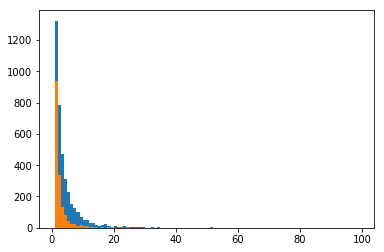

In [41]:
tmp_1 = df_4[(df_4["month"] == 12) & (df_4["day"] == 1)]["user_id"].value_counts()
tmp_2 = df_4[(df_4["month"] == 12) & (df_4["day"] == 12)]["user_id"].value_counts()

plt.hist(tmp_2,
         bins = range(1, 100, 1)
        )

plt.hist(tmp_1, 
         bins = range(1, 100, 1)
        )

In [78]:
# df_4[:10]

In [81]:
start = datetime.datetime(2014, 12, 12)
end = datetime.datetime(2014, 12, 16)
duration_df = df_4[(df_4["time"] <= end) & (df_4["time"] >= start)]

grouped  = duration_df.groupby(["weekday"])
plt.figure()

for d, g in grouped: 
    tmp = g.groupby(["hour"]).size()
    tmp = pd.DataFrame(tmp)
    tmp.columns = ["pv_amount"]
    tmp = tmp.reset_index()
#     sns.lineplot( x = "hour", y = "pv_amount", data = tmp, ax = ax)
#     legend = ax.legend()  
#     p00rint(legend.texts)
#     legend.texts[0].set_text(d)
    plt.plot(tmp["hour"], tmp["pv_amount"], label = d)
plt.legend()


### 转化率

In [14]:
df[:2]

user_id    item_id  behavior_type user_geohash  item_category  \
0  98047837  232431562              1          NaN           4245   
1  97726136  383583590              1          NaN           5894   

                 time  day  month  weekday  hour  
0 2014-12-06 02:00:00    6     12        6     2  
1 2014-12-09 20:00:00    9     12        2    20

In [16]:
# behavior_df = df.drop_duplicates(['user_id', 'item_id', 'behavior_type'], keep = 'first')

In [17]:
# behavior_df.shape

In [41]:
path_group = behavior_df.groupby(["user_id", "item_id"])
count = 0
for (u_id, i_id), g in path_group:
#     behavior = set(list(g["behavior_type"]))
    if g.shape[0] > 1:
        sub_g = g[(g["month"] == 12) & (g["day"] == 12)]
        if sub_g.shape[0]>0:
            g = g.sort_values(by = ["time"], ascending = True)
            print(g[["user_id", "item_id", "behavior_type", "time"]])
            count += 1
    if count > 100:
        break

          user_id    item_id  behavior_type                time
11629048     4913  172639700              4 2014-12-11 18:00:00
1275167      4913  172639700              1 2014-12-12 18:00:00
         user_id    item_id  behavior_type                time
3285682     4913  262532780              2 2014-12-07 18:00:00
833170      4913  262532780              1 2014-12-12 08:00:00
         user_id   item_id  behavior_type       time
658811      7591  38268433              1 2014-12-12
3420617     7591  38268433              4 2014-12-12
         user_id   item_id  behavior_type                time
3728839     7591  93202448              3 2014-12-01 10:00:00
1737064     7591  93202448              4 2014-12-12 00:00:00
659275      7591  93202448              1 2014-12-13 07:00:00
         user_id    item_id  behavior_type                time
7565879     7591  124130706              3 2014-12-11 23:00:00
7565895     7591  124130706              4 2014-12-12 00:00:00
658987      7591  12413

         user_id   item_id  behavior_type                time
7124704   190327  13836833              1 2014-12-12 09:00:00
7124728   190327  13836833              3 2014-12-12 09:00:00
          user_id   item_id  behavior_type                time
1633556    190327  52943414              1 2014-12-12 17:00:00
10008690   190327  52943414              3 2014-12-12 17:00:00
         user_id   item_id  behavior_type                time
1633812   190327  55544761              1 2014-12-12 09:00:00
4274628   190327  55544761              3 2014-12-12 09:00:00
         user_id    item_id  behavior_type                time
657654    190327  119694240              3 2014-12-12 09:00:00
9523425   190327  119694240              1 2014-12-12 09:00:00
          user_id    item_id  behavior_type                time
657542     190327  135635747              1 2014-12-12 09:00:00
10008874   190327  135635747              3 2014-12-12 09:00:00
         user_id    item_id  behavior_type                

         user_id    item_id  behavior_type                time
6662016   250843  135385545              2 2014-12-02 19:00:00
570153    250843  135385545              1 2014-12-12 09:00:00
1236860   250843  135385545              4 2014-12-12 09:00:00
         user_id    item_id  behavior_type                time
3259804   250843  275970719              3 2014-12-12 11:00:00
570577    250843  275970719              1 2014-12-12 22:00:00
6662448   250843  275970719              4 2014-12-12 22:00:00
          user_id    item_id  behavior_type                time
11190211   250843  282290232              2 2014-12-10 19:00:00
5710745    250843  282290232              3 2014-12-10 21:00:00
1236887    250843  282290232              1 2014-12-12 09:00:00
10405726   250843  282290232              4 2014-12-12 09:00:00
         user_id    item_id  behavior_type                time
4139536   250843  317101694              4 2014-12-12 17:00:00
5711305   250843  317101694              3 2014-12

In [42]:
len(path_group)

4686904

### 将一个月拆分成4个时间段，4个周
#### 2014.11.18 - 2014.11.24
#### 2014.11.25 - 2014.12.01
#### 2014.12.02 - 2014.12.08
#### 2012.12.09 - 2014.12.15

In [18]:
start = datetime.datetime(2014, 11, 18)
time_list = [ start + datetime.timedelta(7*n) for n in range(5)]

time_list

In [19]:
duration_df_list = []
for i in range(len(time_list) - 1):
    start_t = time_list[i]
    end_t = time_list[i+1]
    tmp_df = df[(df["time"] >= start_t) & (df["time"] < end_t)]
    duration_df_list.append(tmp_df)

In [20]:
record_df = pd.DataFrame(columns = ("start_time",
                                   "end_time",
                                   "view_count",
                                   "collect_count",
                                   "add_count",
                                   "buy_count"))
for i, tmp_df in enumerate(duration_df_list):
    tmp_behavior_df = tmp_df.drop_duplicates(["user_id", "item_id", "behavior_type" ], keep = "first")
    count_df = tmp_behavior_df["behavior_type"].value_counts()
    count_df = pd.DataFrame(count_df)
#     print(count_df.unstack())
#     print(count_df.loc[1].values[0])
    record_dic = {"start_time": time_list[i],
                 "end_time": time_list[i] + datetime.timedelta(6),
                 "view_count": count_df.loc[1].values[0],
                 "collect_count": count_df.loc[2].values[0],
                 "add_count": count_df.loc[3].values[0],
                 "buy_count": count_df.loc[4].values[0]}
    record_df = record_df.append([record_dic], ignore_index=False)

In [21]:
record_df["collect_rate"] = record_df.apply(lambda r: r["collect_count"]/r["view_count"], axis =1)
record_df["add_rate"] = record_df.apply(lambda r: r["add_count"]/r["view_count"], axis =1)
record_df["buy_rate"] = record_df.apply(lambda r: r["buy_count"]/r["view_count"], axis =1)

In [23]:
record_df 

start_time   end_time view_count collect_count add_count buy_count  \
0 2014-11-18 2014-11-24    1028137         47986     59977     21082   
0 2014-11-25 2014-12-01    1058504         49849     62301     21556   
0 2014-12-02 2014-12-08    1114519         56165     69286     21268   
0 2014-12-09 2014-12-15    1260789         58750     82658     31583   

   collect_rate  add_rate  buy_rate  
0      0.046673  0.058336  0.020505  
0      0.047094  0.058858  0.020365  
0      0.050394  0.062167  0.019083  
0      0.046598  0.065561  0.025050

In [25]:
record_df["stage"] = ["week " + str(n) for n in range(4)]
record_df

start_time   end_time view_count collect_count add_count buy_count  \
0 2014-11-18 2014-11-24    1028137         47986     59977     21082   
0 2014-11-25 2014-12-01    1058504         49849     62301     21556   
0 2014-12-02 2014-12-08    1114519         56165     69286     21268   
0 2014-12-09 2014-12-15    1260789         58750     82658     31583   

   collect_rate  add_rate  buy_rate   stage  
0      0.046673  0.058336  0.020505  week 0  
0      0.047094  0.058858  0.020365  week 1  
0      0.050394  0.062167  0.019083  week 2  
0      0.046598  0.065561  0.025050  week 3

In [26]:
# record_df.to_excel("trans_rate.xlsx")

### 计算每天的转换率

In [29]:
daily_record_df = pd.DataFrame(columns = ("date",
                                   "view_count",
                                   "collect_count",
                                   "add_count",
                                   "buy_count"))

daily_df = df.groupby(["month", "day"])


for (m, d), sub_df in daily_df:
    daily_behavior = sub_df.drop_duplicates(["user_id", "item_id", "behavior_type"], keep = "first")
    count_df = daily_behavior["behavior_type"].value_counts()
    count_df = pd.DataFrame(count_df)
    record_dic = {"date": datetime.datetime(2014, m, d),
                 "view_count": count_df.loc[1].values[0],
                 "collect_count": count_df.loc[2].values[0],
                 "add_count": count_df.loc[3].values[0],
                 "buy_count": count_df.loc[4].values[0]}
    daily_record_df = daily_record_df.append([record_dic], ignore_index=False)    

In [31]:
daily_record_df["collect_rate"] = daily_record_df.apply(lambda r: r["collect_count"]/r["view_count"], axis =1)
daily_record_df["add_rate"] = daily_record_df.apply(lambda r: r["add_count"]/r["view_count"], axis =1)
daily_record_df["buy_rate"] = daily_record_df.apply(lambda r: r["buy_count"]/r["view_count"], axis =1)

In [32]:
daily_record_df

date view_count collect_count add_count buy_count  collect_rate  \
0 2014-11-18     158435          6735      9563      3311      0.042510   
0 2014-11-19     154396          7010      9412      3183      0.045403   
0 2014-11-20     151725          6980      9349      3038      0.046004   
0 2014-11-21     144390          6641      8212      2642      0.045993   
0 2014-11-22     156232          6881      9329      3083      0.044043   
0 2014-11-23     166255          7470      9800      2994      0.044931   
0 2014-11-24     163367          7149      9649      3037      0.043760   
0 2014-11-25     159054          7280      9329      3073      0.045771   
0 2014-11-26     156006          7277      9042      3115      0.046646   
0 2014-11-27     160050          7660      9527      3244      0.047860   
0 2014-11-28     146823          6427      8739      2865      0.043774   
0 2014-11-29     158621          7130      9683      2846      0.044950   
0 2014-11-30     174595          7737     10317      3246      0.044314   
0 2014-12-01     170146          7269     10822      3414      0.042722   
0 2014-12-02     175124          7949     11087      3236      0.045391   
0 2014-12-03     176883          8436     11253      3426      0.047693   
0 2014-12-04     172361          8507     10848      3266      0.049356   
0 2014-12-05     155875          7430      9685      2862      0.047666   
0 2014-12-06     168502          8279     10568      2892      0.049133   
0 2014-12-07     171937          8562     10880      2869      0.049797   
0 2014-12-08     167079          8190     10631      2997      0.049019   
0 2014-12-09     171152          8473     11406      2975      0.049506   
0 2014-12-10     182515          8690     11931      2844      0.047613   
0 2014-12-11     207665          9218     15195      2838      0.044389   
0 2014-12-12     276716         10308     23708     13766      0.037251   
0 2014-12-13     175770          7826     10130      3066      0.044524   
0 2014-12-14     174623          8086      9913      3072      0.046305   
0 2014-12-15     171656          7656      9912      3301      0.044601   
0 2014-12-16     170332          7688      9859      3337      0.045135   
0 2014-12-17     165692          7121      9935      3130      0.042977   
0 2014-12-18     162208          7404      9561      3151      0.045645   

   add_rate  buy_rate  
0  0.060359  0.020898  
0  0.060960  0.020616  
0  0.061618  0.020023  
0  0.056874  0.018298  
0  0.059712  0.019733  
0  0.058946  0.018008  
0  0.059063  0.018590  
0  0.058653  0.019320  
0  0.057959  0.019967  
0  0.059525  0.020269  
0  0.059521  0.019513  
0  0.061045  0.017942  
0  0.059091  0.018592  
0  0.063604  0.020065  
0  0.063309  0.018478  
0  0.063618  0.019369  
0  0.062938  0.018949  
0  0.062133  0.018361  
0  0.062717  0.017163  
0  0.063279  0.016686  
0  0.063629  0.017938  
0  0.066643  0.017382  
0  0.065370  0.015582  
0  0.073171  0.013666  
0  0.085676  0.049748  
0  0.057632  0.017443  
0  0.056768  0.017592  
0  0.057743  0.019230  
0  0.057881  0.019591  
0  0.059961  0.018890  
0  0.058943  0.019426

In [33]:
daily_record_df.to_excel("daily_record_df.xlsx")

### 计算营运指标 每天成交量，成交用户，平均用户成交量

In [37]:
daily_buy_df = pd.DataFrame(columns = ["date",
                                      "buy_amount",
                                      "buy_user",
                                      "avg_buy"])
daily_df = df.groupby(["month", "day"])

for (m, d), sub_df in daily_df:
    buy_part = sub_df[sub_df["behavior_type"] == 4]
    buy_user = len(list(set(buy_part["user_id"])))
    buy_amount = buy_part.shape[0]
#     print(buy_user, buy_amount, buy_amount/buy_user)
    record_dic = {"date": datetime.datetime(2014, m, d),
                     "buy_amount": buy_amount,
                     "buy_user": buy_user,
                     "avg_buy": buy_amount/buy_user,}
    daily_buy_df = daily_buy_df.append([record_dic], ignore_index=False)    

In [38]:
daily_buy_df

date buy_amount buy_user   avg_buy
0 2014-11-18       3730     1539  2.423652
0 2014-11-19       3686     1511  2.439444
0 2014-11-20       3462     1492  2.320375
0 2014-11-21       3021     1330  2.271429
0 2014-11-22       3570     1411  2.530120
0 2014-11-23       3347     1436  2.330780
0 2014-11-24       3426     1524  2.248031
0 2014-11-25       3464     1497  2.313961
0 2014-11-26       3573     1487  2.402824
0 2014-11-27       3670     1527  2.403405
0 2014-11-28       3218     1442  2.231623
0 2014-11-29       3211     1377  2.331881
0 2014-11-30       3616     1534  2.357236
0 2014-12-01       3909     1657  2.359083
0 2014-12-02       3621     1585  2.284543
0 2014-12-03       3885     1697  2.289334
0 2014-12-04       3691     1585  2.328707
0 2014-12-05       3319     1493  2.223041
0 2014-12-06       3272     1452  2.253444
0 2014-12-07       3256     1403  2.320741
0 2014-12-08       3419     1551  2.204384
0 2014-12-09       3449     1429  2.413576
0 2014-12-10       3216     1442  2.230236
0 2014-12-11       3226     1449  2.226363
0 2014-12-12      15251     3897  3.913523
0 2014-12-13       3478     1549  2.245320
0 2014-12-14       3483     1506  2.312749
0 2014-12-15       3764     1627  2.313460
0 2014-12-16       3771     1650  2.285455
0 2014-12-17       3615     1570  2.302548
0 2014-12-18       3586     1552  2.310567

In [42]:
daily_buy_df["date"] = daily_buy_df["date"].map(str)

In [43]:
daily_buy_df.to_excel("daily_buy_df.xlsx")

### 分析礼拜五的情况

In [45]:
min(df["weekday"]), max(df["weekday"])

(1, 7)

In [47]:
start = datetime.datetime(2014, 11, 18)
end = start + datetime.timedelta(7)
start, end

(datetime.datetime(2014, 11, 18, 0, 0), datetime.datetime(2014, 11, 25, 0, 0))

In [48]:
week_df = df[(df["time"] < end) & (df["time"] >= start)]

In [52]:
plt.hist(week_df["hour"], bins = range(0, 24, 1))

(array([100081.,  51001.,  29875.,  21801.,  17398.,  19059.,  35428.,
         63999.,  82612.,  98673., 111119., 111442., 111744., 126080.,
        127620., 127961., 121279., 105286., 110852., 153073., 193457.,
        223689., 390927.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 <a list of 23 Patch objects>)

In [53]:
week_list = []

for i in range(1, 8):
    tmp = week_df[week_df["weekday"] == i]
    week_list.append(tmp)

In [61]:
weekday_hour_df = pd.DataFrame(columns = [i for i in range(24)] + ["weekday"])
weekday_dic = {
    1 : "Monday",
    2 : "Tuesday",
    3 : "Wednesday",
    4 : "Thursday",
    5 : "Friday",
    6 : "Saturday",
    7 : "Sunday"
}

for i, weekday_df in enumerate(week_list):
    print( i + 1)
    count_df = weekday_df["hour"].value_counts()
    count_df = pd.DataFrame( count_df )
    record_dic = {}
    for h in range(24):
        record_dic[h] = count_df.loc[h].values[0]
    record_dic["weekday"] = weekday_dic[i+1]
    weekday_hour_df = weekday_hour_df.append([record_dic], ignore_index=False)

1
2
3
4
5
6
7


In [62]:
weekday_hour_df

0     1     2     3     4     5     6      7      8      9    ...      \
0  15237  7816  4945  3249  2454  2438  4410   8215  10387  13440    ...       
0  13719  7194  5343  3486  2782  3219  4614   8900  10772  15093    ...       
0  13448  6463  3468  3001  2342  3038  5285   8959  12107  14613    ...       
0  13045  6975  3766  2603  2628  2411  4507   8608  11647  14212    ...       
0  14876  6950  3638  2632  2251  2383  4843   8491  10356  12757    ...       
0  14449  7363  3954  3130  2490  3414  6722  10333  12350  13066    ...       
0  15307  8240  4761  3700  2451  2156  5047  10493  14993  15492    ...       

      15     16     17     18     19     20     21     22     23    weekday  
0  19524  17603  15438  16521  23262  29548  33286  33443  26514     Monday  
0  18548  17943  15695  16409  21518  28008  33826  30964  23231    Tuesday  
0  17879  16855  12864  15722  22335  26558  33008  31118  22605  Wednesday  
0  18185  16893  15243  15461  20798  27444  31351  30352  23733   Thursday  
0  16772  15106  14596  14906  19687  24606  27442  29159  24791     Friday  
0  18261  18042  15954  15070  21106  27676  30994  32661  24852   Saturday  
0  18792  18837  15496  16763  24367  29617  33782  32994  24510     Sunday  

[7 rows x 25 columns]

In [63]:
weekday_hour_df.to_excel("weekday_hour_df.xlsx")

### 关于商品类目分类探究降低原因

In [17]:
df[:1]

user_id    item_id  behavior_type user_geohash  item_category  \
0  98047837  232431562              1          NaN           4245   

                 time  day  month  weekday  hour  
0 2014-12-06 02:00:00    6     12        6     2

In [18]:
len(set(df["item_category"]))

8916

In [19]:
item_cat_df = df[["item_id", "item_category"]].drop_duplicates(["item_id", "item_category"])

In [36]:
cat_df = item_cat_df.groupby(["item_category"]).size()
cat_df = pd.DataFrame(cat_df)
cat_df.columns = ["item_amount"]
# cat_df

In [37]:
min(cat_df["item_amount"]), max(cat_df["item_amount"])

(1, 83758)

In [38]:
cat_group = df.groupby(["item_category"]).size()
cat_group = pd.DataFrame(cat_group)
cat_group.columns = ["cat_freq"]
cat_group

cat_freq
item_category          
2                     3
3                     3
4                     1
6                    10
8                   993
10                  228
11                 8995
12                  221
13                  113
15                  727
16                  588
18                   35
19                   25
21                  159
23                    2
24                 1625
25                   31
26                    3
28                   92
29                    7
30                   26
32                   22
33                    4
34                  144
35                  181
40                    2
43                 1148
46                  124
47                 1014
53                   16
...                 ...
14033              6265
14035               266
14038              4835
14041              1013
14045                18
14046                10
14047               380
14049               220
14050               299
14051                80
14053                31
14054                26
14055                63
14056                40
14057                64
14060                64
14061              2066
14064               697
14065                13
14066               202
14068                35
14071                 6
14072                 4
14073               255
14074                 9
14075                48
14076                29
14078                60
14079             98190
14080                90

[8916 rows x 1 columns]

In [29]:
user_cat_df = df.drop_duplicates(["item_category", "user_id", "behavior_type"], keep = "first")

def cal_type_user_amount(bt):
    type_user_df = user_cat_df[user_cat_df["behavior_type"] == bt].groupby(["item_category"]).size()
    type_user_df = pd.DataFrame(type_user_df)
    type_user_df.columns = [str(bt) + "_amount"]
    return type_user_df

# view user
cat_view_df = cal_type_user_amount(bt = 1)

# collect user 
cat_collect_df = cal_type_user_amount(bt = 2)

# add to basket
cat_add_df = cal_type_user_amount(bt = 3)

# buy_user
cat_buy_df = cal_type_user_amount(bt = 4)

In [33]:
cat_add_df

3_amount
item_category          
8                     4
10                    6
11                   36
12                    6
13                    2
15                    4
16                   23
18                    2
21                    6
24                   10
28                    3
34                    5
35                    2
43                   10
46                    1
47                   15
53                    1
56                   17
57                    1
58                    2
59                    1
66                    4
67                    9
68                    2
72                    1
75                    3
77                   11
78                    1
80                    3
83                    3
...                 ...
14017                 5
14018                13
14023                10
14024                15
14028                 1
14033               114
14035                 1
14038                72
14041                32
14045                 1
14046                 1
14047                 5
14049                 3
14050                 3
14051                 2
14053                 1
14054                 1
14055                 7
14057                 1
14060                 1
14061                42
14064                10
14065                 1
14066                 4
14068                 1
14073                 1
14075                 1
14076                 1
14079               840
14080                 1

[5435 rows x 1 columns]

In [39]:
cat_df = pd.merge(cat_df, cat_group, left_index = True, right_index = True)
cat_df.shape

(8916, 2)

In [40]:
cat_df = pd.merge(cat_df, cat_view_df, left_index = True, right_index = True, how = "outer")
cat_df = pd.merge(cat_df, cat_collect_df, left_index = True, right_index = True, how = "outer")
cat_df = pd.merge(cat_df, cat_add_df, left_index = True, right_index = True, how = "outer")
cat_df = pd.merge(cat_df, cat_buy_df, left_index = True, right_index = True, how = "outer")

In [41]:
cat_df.shape

(8916, 6)

In [43]:
cat_df = cat_df.fillna(0)
cat_df

item_amount  cat_freq  1_amount  2_amount  3_amount  4_amount
item_category                                                               
2                        1         3       1.0       0.0       0.0       0.0
3                        2         3       1.0       0.0       0.0       0.0
4                        1         1       1.0       0.0       0.0       0.0
6                        8        10       8.0       0.0       0.0       0.0
8                      335       993      51.0       3.0       4.0       4.0
10                      90       228      60.0       3.0       6.0       4.0
11                    1872      8995     827.0      47.0      36.0       5.0
12                      83       221      26.0       6.0       6.0       4.0
13                      27       113      20.0       4.0       2.0       1.0
15                     303       727      58.0       4.0       4.0       2.0
16                     156       588      75.0       5.0      23.0      14.0
18                      11        35       6.0       0.0       2.0       1.0
19                      15        25      15.0       0.0       0.0       0.0
21                      69       159      22.0       2.0       6.0       2.0
23                       1         2       1.0       0.0       0.0       0.0
24                     259      1625     290.0      11.0      10.0       4.0
25                      21        31      11.0       0.0       0.0       0.0
26                       1         3       1.0       0.0       0.0       0.0
28                      27        92      16.0       4.0       3.0       5.0
29                       2         7       2.0       0.0       0.0       0.0
30                       7        26       7.0       1.0       0.0       0.0
32                       9        22       7.0       0.0       0.0       1.0
33                       1         4       1.0       0.0       0.0       0.0
34                      53       144      24.0       3.0       5.0       1.0
35                      77       181      40.0       0.0       2.0       5.0
40                       1         2       1.0       0.0       0.0       0.0
43                     382      1148      79.0       7.0      10.0      10.0
46                      46       124      24.0       3.0       1.0       2.0
47                     246      1014     101.0      18.0      15.0       8.0
53                       6        16       3.0       1.0       1.0       0.0
...                    ...       ...       ...       ...       ...       ...
14033                 1680      6265     738.0      59.0     114.0      65.0
14035                   78       266      20.0       2.0       1.0       1.0
14038                  736      4835     592.0      87.0      72.0      28.0
14041                  263      1013     153.0       9.0      32.0      22.0
14045                    9        18       5.0       0.0       1.0       0.0
14046                    1        10       1.0       0.0       1.0       1.0
14047                  176       380      74.0       1.0       5.0       5.0
14049                   68       220      19.0       2.0       3.0       1.0
14050                   81       299      44.0       2.0       3.0       3.0
14051                    9        80      30.0       0.0       2.0       0.0
14053                   10        31       9.0       0.0       1.0       0.0
14054                   13        26      10.0       2.0       1.0       1.0
14055                   17        63      14.0       1.0       7.0       3.0
14056                   13        40      12.0       1.0       0.0       0.0
14057                   24        64      23.0       1.0       1.0       1.0
14060                   13        64       6.0       1.0       1.0       1.0
14061                  391      2066     266.0      28.0      42.0      28.0
14064                  188       697      79.0       6.0      10.0      10.0
14065                    3        13       2.0       1.0       1.0       0.0
14066      

In [45]:
cat_df["4/1 ratio"] = cat_df.apply(lambda r: r["4_amount"]/r["1_amount"], axis =1)
cat_df["3/1 ratio"] = cat_df.apply(lambda r: r["3_amount"]/r["1_amount"], axis =1)
cat_df["2/1 ratio"] = cat_df.apply(lambda r: r["2_amount"]/r["1_amount"], axis =1)

/home/yangsi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in double_scalars
  """Entry point for launching an IPython kernel.
/home/yangsi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in double_scalars
  """Entry point for launching an IPython kernel.
/home/yangsi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  
/home/yangsi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  
/home/yangsi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


In [46]:
cat_df

item_amount  cat_freq  1_amount  2_amount  3_amount  4_amount  \
item_category                                                                  
2                        1         3       1.0       0.0       0.0       0.0   
3                        2         3       1.0       0.0       0.0       0.0   
4                        1         1       1.0       0.0       0.0       0.0   
6                        8        10       8.0       0.0       0.0       0.0   
8                      335       993      51.0       3.0       4.0       4.0   
10                      90       228      60.0       3.0       6.0       4.0   
11                    1872      8995     827.0      47.0      36.0       5.0   
12                      83       221      26.0       6.0       6.0       4.0   
13                      27       113      20.0       4.0       2.0       1.0   
15                     303       727      58.0       4.0       4.0       2.0   
16                     156       588      75.0       5.0      23.0      14.0   
18                      11        35       6.0       0.0       2.0       1.0   
19                      15        25      15.0       0.0       0.0       0.0   
21                      69       159      22.0       2.0       6.0       2.0   
23                       1         2       1.0       0.0       0.0       0.0   
24                     259      1625     290.0      11.0      10.0       4.0   
25                      21        31      11.0       0.0       0.0       0.0   
26                       1         3       1.0       0.0       0.0       0.0   
28                      27        92      16.0       4.0       3.0       5.0   
29                       2         7       2.0       0.0       0.0       0.0   
30                       7        26       7.0       1.0       0.0       0.0   
32                       9        22       7.0       0.0       0.0       1.0   
33                       1         4       1.0       0.0       0.0       0.0   
34                      53       144      24.0       3.0       5.0       1.0   
35                      77       181      40.0       0.0       2.0       5.0   
40                       1         2       1.0       0.0       0.0       0.0   
43                     382      1148      79.0       7.0      10.0      10.0   
46                      46       124      24.0       3.0       1.0       2.0   
47                     246      1014     101.0      18.0      15.0       8.0   
53                       6        16       3.0       1.0       1.0       0.0   
...                    ...       ...       ...       ...       ...       ...   
14033                 1680      6265     738.0      59.0     114.0      65.0   
14035                   78       266      20.0       2.0       1.0       1.0   
14038                  736      4835     592.0      87.0      72.0      28.0   
14041                  263      1013     153.0       9.0      32.0      22.0   
14045                    9        18       5.0       0.0       1.0       0.0   
14046                    1        10       1.0       0.0       1.0       1.0   
14047                  176       380      74.0       1.0       5.0       5.0   
14049                   68       220      19.0       2.0       3.0       1.0   
14050                   81       299      44.0       2.0       3.0       3.0   
14051                    9        80      30.0       0.0       2.0       0.0   
14053                   10        31       9.0       0.0       1.0       0.0   
14054                   13        26      10.0       2.0       1.0       1.0   
14055                   17        63      14.0       1.0       7.0       3.0   
14056                   13        40      12.0       1.0       0.0       0.0   
14057                   24        64      23.0       1.0       1.0       1.0   
14060                   13        64       6.0       1.0       1.0       1.0   
14061                  391      2066     266.0      28.0      42.0      28.0   
14064          

In [87]:
cat_df[cat_df["cat_freq"] > 1000].shape

(1239, 2)

In [48]:
# cat_df.to_excel("cat_df.xlsx")

In [50]:
# cat_df = cat_df.sort_values( by=["cat_freq"], ascending=False )
cat_df

item_amount  cat_freq  1_amount  2_amount  3_amount  4_amount  \
item_category                                                                  
1863                 83354    393247    5995.0    1631.0    2041.0    1252.0   
13230                74067    356773    5617.0    1370.0    1393.0     564.0   
5027                 60323    334280    5497.0    1289.0    1364.0     627.0   
5894                 83758    330207    5277.0    1338.0    1484.0     605.0   
6513                 65045    295768    5281.0    1390.0    1623.0     698.0   
5399                 54559    281739    5310.0    1279.0    1431.0     651.0   
11279                47538    187056    4712.0    1022.0    1122.0     585.0   
2825                 43997    163626    4551.0     964.0    1092.0     413.0   
5232                 25900    144200    4967.0     908.0    1483.0     954.0   
10894                33482    138782    4521.0     911.0    1171.0     592.0   
4370                 30437    121728    4513.0     855.0    1098.0     494.0   
5689                 30631    116029    4052.0     794.0     864.0     361.0   
3064                 16562    112805    1990.0     448.0     548.0     331.0   
6000                 14204    107606    4594.0     403.0     454.0     258.0   
14079                24376     98190    3584.0     686.0     840.0     368.0   
10392                21316     97029    3830.0     659.0     899.0     518.0   
5395                 19020     96878    2891.0     503.0     414.0     118.0   
6344                 20401     93059    4151.0     612.0    1158.0     825.0   
3381                 16590     88586    4151.0     542.0     652.0     346.0   
9516                 21648     86683    2631.0     390.0     791.0     442.0   
11552                16386     78214    3981.0     513.0     685.0     374.0   
6054                 22318     78048    3524.0     669.0     592.0     245.0   
3628                 17103     73705    3757.0     477.0     670.0     475.0   
5503                 20152     72765    3265.0     611.0     616.0     230.0   
11824                15438     71109    3048.0     502.0     671.0     400.0   
1083                 16484     69782    3465.0     520.0     688.0     350.0   
8877                 14425     67689    2306.0     378.0     612.0     617.0   
5271                 15137     67523    2442.0     373.0     513.0     243.0   
10533                19266     67119    3380.0     585.0     519.0     125.0   
3783                 12521     66274    3060.0     482.0     577.0     258.0   
...                    ...       ...       ...       ...       ...       ...   
7327                     1         1       1.0       0.0       0.0       0.0   
7369                     1         1       1.0       0.0       0.0       0.0   
13342                    1         1       1.0       0.0       0.0       0.0   
6297                     1         1       1.0       0.0       0.0       0.0   
6279                     1         1       1.0       0.0       0.0       0.0   
13364                    1         1       1.0       0.0       0.0       0.0   
5228                     1         1       1.0       0.0       0.0       0.0   
5243                     1         1       1.0       0.0       0.0       0.0   
5250                     1         1       1.0       0.0       0.0       0.0   
5261                     1         1       1.0       0.0       0.0       0.0   
5294                     1         1       1.0       0.0       0.0       0.0   
5307                     1         1       1.0       0.0       0.0       0.0   
5312                     1         1       1.0       0.0       0.0       0.0   
5419                     1         1       1.0       0.0       0.0       0.0   
5659                     1         1       1.0       0.0       0.0       0.0   
5695                     1         1       1.0       0.0       0.0       0.0   
5713                     1         1       1.0       0.0       0.0       0.0   
5714           

In [60]:
sum_freq = sum(cat_df["cat_freq"]) 
sum_freq

12256906

In [54]:
cat_df.shape

(8916, 9)

In [63]:
length = int(cat_df.shape[0]/20)
length

445

In [64]:
freq_list = []
for i in range(20):
    start_index = i * length
    end_index = ( i+1 ) * length
    slice_df = cat_df[start_index:end_index]
    slice_freq = sum(slice_df["cat_freq"])
    freq_list.append((slice_freq, slice_freq/sum_freq))
freq_list

[(9581103, 0.7816901753183063),
 (1126606, 0.09191601861024308),
 (538074, 0.04389965950624081),
 (322769, 0.026333644069718738),
 (205454, 0.016762305266924623),
 (140183, 0.011437062501743915),
 (100615, 0.008208841611414821),
 (70122, 0.005721019643946034),
 (50402, 0.004112130744904138),
 (36340, 0.002964859157767874),
 (25854, 0.0021093414602347442),
 (18514, 0.001510495389293187),
 (13571, 0.0011072125379765498),
 (9653, 0.0007875560112804977),
 (6562, 0.000535371650888079),
 (4464, 0.00036420284205491987),
 (2981, 0.00024320982799411206),
 (1877, 0.00015313815737837916),
 (1122, 9.154023046272853e-05),
 (624, 5.091007469584902e-05)]

hot_cat_df = cat_df[:length]
hot_cat = hot_cat_df.index.values
hot_cat

#### 445 个类目，即5%类目占取78%流量

In [77]:
len(hot_cat)

445

### 探访 hot category 中周五的变化

In [72]:
start = datetime.datetime(2014, 11, 18)
end = datetime.datetime(2014, 12, 1)

In [74]:
sel_df = df[(df["time"] >= start) & (df["time"] <= end)]
sel_df = df[df["item_category"].isin(hot_cat)]

In [76]:
sel_df

user_id    item_id  behavior_type user_geohash  item_category  \
0          98047837  232431562              1          NaN           4245   
1          97726136  383583590              1          NaN           5894   
2          98607707   64749712              1          NaN           2883   
4          98145908  290208520              1          NaN          13926   
5          93784494  337869048              1          NaN           3979   
6          94832743  105749725              1          NaN           9559   
7          95290487   76866650              1          NaN          10875   
8          96610296  161166643              1          NaN           3064   
11        101781721  139144131              1      9rgt162           3424   
12        103891828  255365467              1      96sjmho            552   
13        101260672  212072908              1      95q0is4          10984   
14        104811265  322736792              1          NaN           6513   
16        104221274  262661866              1          NaN           4370   
18        100684618  185630324              1          NaN           5204   
19        100509623   76021805              1          NaN           1308   
20        101781721   19349307              1      9rgt16g           1863   
21        103891828  149380817              1          NaN           7876   
23        104811265  328893812              1          NaN           5894   
25        104221274  114830658              1          NaN           9516   
26        110418606  335988905              1          NaN          10703   
27        100684618   66146539              1          NaN           3783   
28        100509623  236195070              1          NaN           1863   
29        101781721   46475830              1      9rgt17q          13230   
30        103891828  260817036              1      96sjmhk            552   
32        104811265  391073843              1          NaN          10314   
33        103802946  194298205              1          NaN          11406   
34        104221274  256864783              1          NaN           6512   
35        110418606  148461212              1          NaN          10703   
36        100684618  375252803              1          NaN           5399   
37        100509623  212091747              1          NaN           3431   
...             ...        ...            ...          ...            ...   
12256872   91530370  162649342              1          NaN           5232   
12256875   91530370  263124624              1          NaN           4640   
12256876   91530370  277962627              1          NaN           4640   
12256877   91530370  136942019              1          NaN           9820   
12256878   91530370  170765640              1          NaN           3381   
12256879   91530370  309381689              1          NaN          11552   
12256880   91530370  130056262              1          NaN          11552   
12256881   91530370   82501758              1          NaN            552   
12256882   91530370  393936911              3          NaN           8792   
12256883   91530370  393936911              1          NaN           8792   
12256884   91530370  186332216              1          NaN            552   
12256885   91530370  384717078              2          NaN           7876   
12256886   91530370  293543750              3          NaN            552   
12256887   91530370  183076534              1          NaN           9720   
12256888   91530370  183076534              1          NaN           9720   
12256889   91530370  241618446              1          NaN           3381   
12256890   91530370  241618446              1          NaN           3381   
12256891   91530370  183076534              1          NaN           9720   
12256892   91530370  183076534              1          NaN           9720   
12256893   91530370  183076534              1          NaN           9720   
12256894

In [83]:
hot_cat_weekday_df = pd.DataFrame(
    columns =  ["category"] + [_ for _ in range(1, 8, 1)])

cat_g = sel_df.groupby(["item_category"])

for cat, g in cat_g:
    count_df = g["weekday"].value_counts()
    count_df = pd.DataFrame(count_df)
    record_dic = {"category": cat}
    for i in range(1, 8, 1):
        record_dic[i] = count_df.loc[i].values[0]
    hot_cat_weekday_df = hot_cat_weekday_df.append(record_dic, ignore_index = True)
hot_cat_weekday_df

category      1      2      3      4      5      6      7
0         11   1188   1527   1356   1332   1389   1173   1030
1         94    711    775    956   1004    797    705    847
2        107    748   1348   1215   1043   1122    994   1392
3        150    696    805    895    907    825    451    657
4        198    990   1825   1628   2037   1414   1368   1077
5        215   1066   1000   1150   1302    828    829   1053
6        231    699   1325   1350   1420   1198   1009    939
7        242   1680   2707   2649   2862   2338   1996   1899
8        284    994   1092   1000    833   1125   1004   1178
9        292   1896   2938   2829   3271   2614   2686   2201
10       363    589   1190   1009    657    674    596    508
11       436   1882   2264   2040   2014   1930   1787   1740
12       437   2839   4095   4213   4351   4036   3263   3445
13       438    659    881    620    637    648    447    560
14       444    462    530    639    588    493    748    619
15       446   1905   2587   1971   2438   2246   1620   1711
16       451   1285   1586   1693   1751   1020   1174   1224
17       492   1642   1637   1668   1727   1427   1571   1639
18       508   5849   7971   7811   7880   6211   5663   5223
19       552   8332   9942  10048  10837   9174   6970   8576
20       603    584    707    734    834    601    793    651
21       630    493    600    716    765    491    483    500
22       675   1250   1189   1266   1053   1107    938   1106
23       733    582    649    606    648    690    602    421
24       740    539    808    779   1142    839    744    605
25       767    750    800   1010    938   1044    736    487
26       814   1140   1330   1196   1544   1037   1152    841
27       874   3474   3909   4249   4129   3374   2687   2586
28       881    676    801    750    617    611    539    609
29       887    850    670    617    673    608    788    668
..       ...    ...    ...    ...    ...    ...    ...    ...
415    12744    898   1682   1066   1096   1036    831    932
416    12753   1183   1478   1292   1296    964   1022   1056
417    12855   4629   5032   5157   5960   4599   4889   4917
418    12863   2518   3021   2934   3082   2332   1891   2771
419    12919    744    917    805    779   1138    712    597
420    12973    803   1147   1062   1101   1013   1057   1297
421    12982   1457   2165   1647   1940   1825   1289   1304
422    13003    611    761    546    712    715    421    625
423    13038    767    832    784    886    936    631    729
424    13041   3836   4214   5332   4904   4696   3812   3532
425    13152    628   1006   1062   1060    677    939    740
426    13230  42435  57834  59189  55966  49322  45284  46743
427    13280    549    869    835    827    845    607    526
428    13288    745    783    856   1179   1147    613    583
429    13326   1044    782    884   1180    752    950    756
430    13338   3902   3600   4193   4054   3187   2748   3333
431    13381   1114   2040   1836   1529   1403   1576   1419
432    13500   2523   3071   3284   3363   2655   2626   2604
433    13547    469    806    771    662    597    545    742
434    13599    583    624    567    468    543    885    511
435    13712    407    828    770    950    732    598    605
436    13727   1588   1975   2368   2123   1452   1235   1709
437    13823    796    623    610   1145    771    597    871
438    13846    478    770    770    693    847    509    467
439    13852    673    723    696    824    966    652    639
440    13853    508    743    604    678    663    456    472
441    13926   1049   1308   1056   1202    931    714    660
442    14033    697   1180   1034   1046    865    765    678
443    14038    582    696    781    939    664    546    627
444    14079  12550  15971  15062  15310  13518  13451  12328

[445 rows x 8 columns]

In [84]:
hot_cat_weekday_df.to_excel("hot_cat_weekday.xlsx")

### 用户标签：用户活跃时间，daily，weekly
### 用户上线频率。。

### 有关促销的分析。。
### 40% 双十二并未购物，但是浏览了